In [ ]:
import pandas as pd
import pickle as pkl
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, HalvingGridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/IS4303/notebooks/new_cleaned

In [ ]:
X_train = pd.read_csv('5X_train.csv')
X_test = pd.read_csv('4X_test.csv')
y_train = pd.read_csv('5y_train.csv')
y_test = pd.read_csv('4y_test.csv')

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train['is_canceled']
y_test = y_test['is_canceled']

In [ ]:
def evaluation(y_test, y_pred, y_pred_prob):
    print('==========')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()
    print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t{}\nF1:\t{}\nAUC:\t{}".format(accuracy_score(y_test, y_pred),
                                                                                 precision_score(y_test, y_pred),
                                                                                 recall_score(y_test, y_pred),
                                                                                 f1_score(y_test, y_pred),
                                                                                 auc(fpr, tpr)))

##XGB_1 (4X/Y, roc_auc)

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.7, 1],
    'reg_lambda': [0.1, 1]
}

In [ ]:
grid_search = HalvingGridSearchCV(xgboost_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, random_state=123)
grid_search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'gamma': [0, 0.1, 0.5],
                                'learning_rate': [0.1, 0.5, 1],
                                'max_depth': [3, 5, 7],
                                'min_child_weight': [1, 3, 5],
                                'n_estimators': [50, 100, 200],
                                'reg_lambda': [0.1, 1], 'subsample': [0.7, 1]},
                    random_state=123, scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200,
 'reg_lambda': 1,
 'subsample': 0.7}

In [ ]:
grid_search.best_score_

0.8457729989921082

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, reg_lambda=1, subsample=0.7)
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgboost_classifier.predict(X_test)
y_pred_prob = xgboost_classifier.predict_proba(X_test)[:,1]

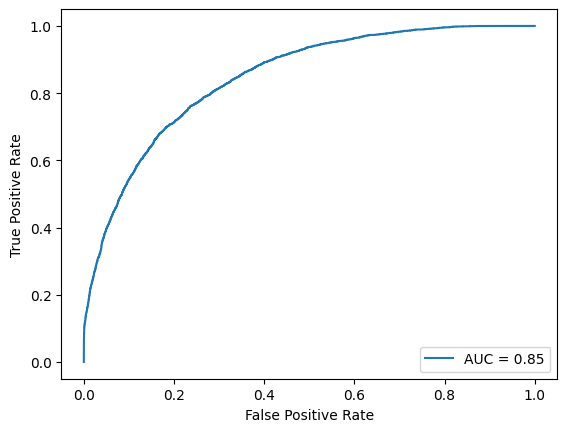

Accuracy:	0.7891833087263967
Precision:	0.7131230925737538
Recall:	0.5297229219143577
F1:	0.6078913137736667
AUC:	0.845919531331599


In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

##XGB_2 (4X/Y, roc_auc)

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123)
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [3, 5, 7, 9],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.7, 0.9],
    'reg_lambda': [0.5, 1],
    'colsample_bytree': [0.2, 0.5, 0.9]
}

In [ ]:
grid_search = HalvingGridSearchCV(xgboost_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, random_state=123)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.49954125 0.5        0.5       ]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.66902902 0.69675943 0.67869612]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.6814448  0.68568086 0.68497632]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non

HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=Non...
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'colsample_bytree': [0.2, 0.5, 0.9],
                                'gamma': [0, 0.1, 0.5],
                                'learning_rate': [0.01, 0.1, 0.2],
                                'max_depth': [3, 5, 7, 9],
                                'min_child_weight': [3, 5, 7, 9],
                                'n_estimators': [50, 100, 150, 200],
                                'reg_lambda': [0.5, 1],
                                'subsample': [0.5, 0.7, 0.9]},
                    random_state=123, scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 200,
 'reg_lambda': 1,
 'subsample': 0.9}

In [ ]:
grid_search.best_score_

0.8456221306979252

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, reg_lambda=1, subsample=0.9)
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgboost_classifier.predict(X_test)
y_pred_prob = xgboost_classifier.predict_proba(X_test)[:,1]

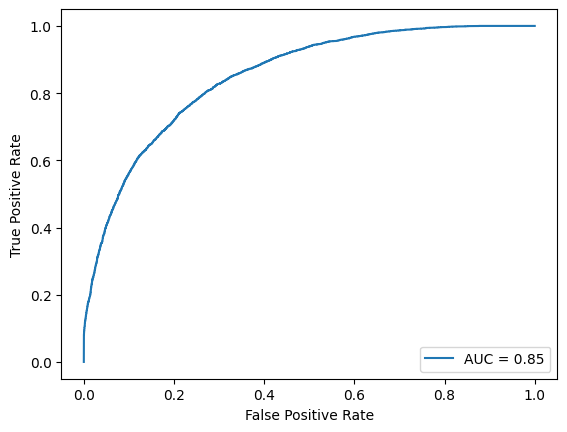

Accuracy:	0.7955552101950424
Precision:	0.7154811715481172
Recall:	0.5599496221662469
F1:	0.6282323018228063
AUC:	0.8506103762260101


In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

##XGB_3 (5X/Y, f1)

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.7, 1],
    'reg_lambda': [0.1, 1]
}

In [ ]:
grid_search = HalvingGridSearchCV(xgboost_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1, random_state=123)
grid_search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'gamma': [0, 0.1, 0.5],
                                'learning_rate': [0.1, 0.5, 1],
                                'max_depth': [3, 5, 7],
                                'min_child_weight': [1, 3, 5],
                                'n_estimators': [50, 100, 200],
                                'reg_lambda': [0.1, 1], 'subsample': [0.7, 1]},
                    random_state=123, scoring='f1')

In [ ]:
grid_search.best_params_

{'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 200,
 'reg_lambda': 1,
 'subsample': 0.7}

In [ ]:
grid_search.best_score_

0.7980918556523833

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, reg_lambda=1, subsample=0.7)
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgboost_classifier.predict(X_test)
y_pred_prob = xgboost_classifier.predict_proba(X_test)[:,1]

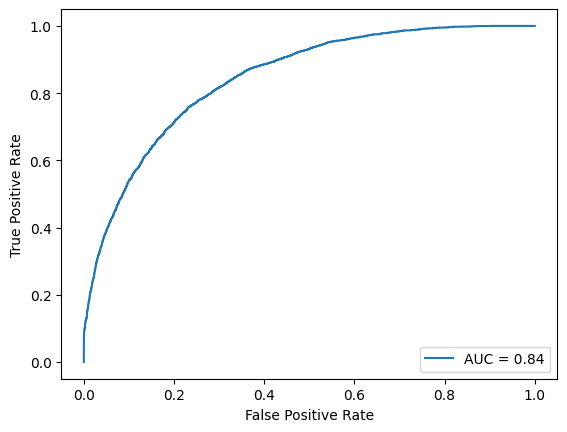

Accuracy:	0.7670370658170798
Precision:	0.5985401459854015
Recall:	0.7435768261964736
F1:	0.6632217479218153
AUC:	0.8446061213681779


In [ ]:
evaluation(y_test, y_pred, y_pred_prob)

##XGB_4 (5X/Y, f1)

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123)
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [3, 5, 7, 9],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.7, 0.9],
    'reg_lambda': [0.5, 1],
    'colsample_bytree': [0.2, 0.5, 0.9]
}

In [ ]:
grid_search = HalvingGridSearchCV(xgboost_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1, random_state=123)
grid_search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=Non...
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...),
                    n_jobs=-1,
                    param_grid={'colsample_bytree': [0.2, 0.5, 0.9],
                                'gamma': [0, 0.1, 0.5],
                                'learning_rate': [0.01, 0.1, 0.2],
                                'max_depth': [3, 5, 7, 9],
                                'min_child_weight': [3, 5, 7, 9],
                                'n_estimators': [50, 100, 150, 200],
                                'reg_lambda': [0.5, 1],
                                'subsample': [0.5, 0.7, 0.9]},
                    random_state=123, scoring='f1')

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 200,
 'reg_lambda': 0.5,
 'subsample': 0.9}

In [ ]:
grid_search.best_score_

0.8202776653458956

In [ ]:
xgboost_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123, colsample_bytree=0.2, gamma=0.5, learning_rate=0.1, max_depth=9, min_child_weight=3, n_estimators=200, reg_lambda=0.5, subsample=0.9)
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgboost_classifier.predict(X_test)
y_pred_prob = xgboost_classifier.predict_proba(X_test)[:,1]

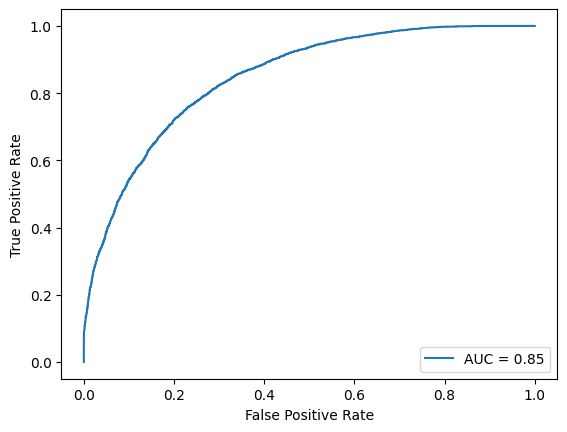

Accuracy:	0.7777605097521175
Precision:	0.6239392585975883
Recall:	0.7037783375314861
F1:	0.6614583333333334
AUC:	0.8472187037119333


In [ ]:
evaluation(y_test, y_pred, y_pred_prob)